# Data Analysis jobs.ch
data from 8.1.2025

In [118]:
import pandas as pd
import json
import os
import seaborn as sns
import re
import matplotlib.pyplot as plt 

In [119]:
parent_dir = os.getcwd()

file_path = os.path.join(parent_dir, '..', 'data', 'jobs_processed.json')

with open(file_path, 'r') as file:
    jobs = json.load(file)

df = pd.DataFrame(jobs)

df.head()

,url,downloaded,search_query,publication_date,workload,contract_type,language,place_of_work,job_title,company,...,job_category,career_stage_cleaned,programming_languages,frameworks,tools,operating_systems,years,education,salary,website
0,https://www.jobs.ch/en/vacancies/detail/b269d1...,True,software engineer,24 January 2025,100%,Unlimited employment,"German (Native language), English (Fluent)","Hinterbergstrasse 18, 6312 Steinhausen",Software Engineer Mobile,CyOne Security AG,...,Software Engineer,None,"[C, C++]",[],[CI/CD],[Linux],[],[Bachelor],NaN,NaN
1,https://www.jobs.ch/en/vacancies/detail/21771c...,True,software engineer,05 February 2025,80 – 100%,Unlimited employment,German (Fluent),"Uttigenstrasse 36, 3600 Thun",Software Engineer C2I,RUAG AG,...,Software Engineer,None,"[C, C++, Java]",[Angular],[],[],[],[Vocational],NaN,NaN
2,https://www.jobs.ch/en/vacancies/detail/1277f0...,True,software engineer,03 February 2025,100%,Unlimited employment,"German (Fluent), English (Fluent)","Spitalstrasse 38, 8630 Rüti ZH",Automation Software Engineer,PackSys Global AG,...,Software Engineer,None,[R],[],[],[],[],[],NaN,NaN
3,https://www.jobs.ch/en/vacancies/detail/c4ba7c...,True,software engineer,13 January 2025,100%,Unlimited employment,"German (Intermediate), English (Intermediate)","Durachweg 13, 8200 Schaffhausen",Software Engineer (C++),Urban Games GmbH,...,Software Engineer,None,"[C, C++, Lua]",[],[],[],[3],[Master],NaN,NaN
4,https://www.jobs.ch/en/vacancies/detail/d94c7c...,True,software engineer,15 January 2025,80 – 100%,Unlimited employment,"German (Fluent), English (Fluent)",Aarau,Fullstack Software Engineer,Helbling Technik,...,Software Engineer,None,"[C, C++, HTML, Java, JavaScript]","[Angular, React]",[],[],[],[],NaN,NaN


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    4058 non-null   object
 1   downloaded             4058 non-null   bool  
 2   search_query           4058 non-null   object
 3   publication_date       1745 non-null   object
 4   workload               1252 non-null   object
 5   contract_type          1224 non-null   object
 6   language               1002 non-null   object
 7   place_of_work          1753 non-null   object
 8   job_title              4058 non-null   object
 9   company                3009 non-null   object
 10  descriptions           4058 non-null   object
 11  job_title_cleaned      1736 non-null   object
 12  job_category           1736 non-null   object
 13  career_stage_cleaned   722 non-null    object
 14  programming_languages  4058 non-null   object
 15  frameworks           

In [121]:
# List of Swiss canton names and abbreviations
cantons = [
    "Aargau", "AG", "Appenzell Ausserrhoden", "AI", "Appenzell Innerrhoden", 
    "AR", "Basel-Landschaft", "BL", "Basel-Stadt", "BS", "Bern", "BE", "Fribourg", 
    "FR", "Geneva", "GE", "Glarus", "GL", "Graubünden", "GR", "Jura", "JU", "Luzern", 
    "LU", "Neuchatel", "NE", "Nidwalden", "NW", "Obwalden", "OW", "Schaffhausen", 
    "SH", "Schwyz", "SZ", "Solothurn", "SO", "St. Gallen", "SG", "Ticino", "TI", 
    "Thurgau", "TG", "Uri", "UR", "Valais", "VS", "Vaud", "VD", "Zug", "ZG", 
    "Zürich", "ZH"
]

# Create a dictionary of abbreviations mapping to full canton names
canton_dict = {
    "AG": "Aargau", "AI": "Appenzell Ausserrhoden", "AR": "Appenzell Innerrhoden", 
    "BL": "Basel-Landschaft", "BS": "Basel-Stadt", "BE": "Bern", "FR": "Fribourg", 
    "GE": "Geneva", "GL": "Glarus", "GR": "Graubünden", "JU": "Jura", "LU": "Luzern", 
    "NE": "Neuchatel", "NW": "Nidwalden", "OW": "Obwalden", "SH": "Schaffhausen", 
    "SZ": "Schwyz", "SO": "Solothurn", "SG": "St. Gallen", "TI": "Ticino", 
    "TG": "Thurgau", "UR": "Uri", "VS": "Valais", "VD": "Vaud", "ZG": "Zug", 
    "ZH": "Zürich"
}

def extract_canton(address):
    if not isinstance(address, str):
        return None
    address_lower = address.lower()  # Make address lowercase for easier matching
    for canton in cantons:
        # Match canton names or abbreviations (case-insensitive)
        if re.search(r"\b" + re.escape(canton.lower()) + r"\b", address_lower):
            return canton_dict.get(canton.upper(), canton)  # Ensure abbreviation maps to full name
    return None  # If no canton is found

# Apply the function to extract canton
df["canton"] = df["place_of_work"].apply(extract_canton)

In [122]:
# data cleaning
df['publication_date'] = pd.to_datetime(df['publication_date'] , format='mixed')
df["years"] = df["years"].apply(lambda x: [i for i in x if i <20]) # filter experience larger than 20 out
df["max_years"] = df["years"].apply(lambda x: max(x) if x else 0)
df["career_stage_cleaned"] = df["career_stage_cleaned"].apply(lambda x: x if x else "Not Explicit")


In [123]:

for i in df['job_title'][df['job_title_cleaned'].isnull()]:
    print(i)


Junior Quantitative Researcher
Digital Assets Trader, eFX & DA Trading
Engineer Hard- und Software
Software-Expert:in für Backend & Integration (Java)
Projektleiter / Projektleiterin mit Fokus Cyber Security
R&D Engineer Analytical Instruments – Schwerpunkt Embedded Software (m/w/d)
Senior Golang Engineer (f|m|d) (80-100%) - Valbonne - Hybrid Work
Applikation Engineer CodX PostOffice (a)
Business Integration Engineer (w/m/d) - Integrierte Planung
Senior Pega Developer 80–100 % (m/w/d)
DevOps-Profi (70-100%)
Business Solutions Designer:in 100%
RPA Developer (Robotic Process Automation) 80-100% (w/m/d)
Senior .Net / Azure Entwickler (a) 80 - 100%
Senior Entwickler Microsoft Power Platform (m/w/d)
AI Developer
ServiceNow Inhouse Administrator / Developer 80-100 % (alle)
Application Specialist (80-100%)
Support Consultant / Software Expert (a) 80-100% [Ref:2564]
Développeur java
Business Central Entwickler (a)
EU Respiratory Clinical Application Specialist
Front Arena Developer (w/m/d)
IFS

In [124]:
df["workload"].value_counts()

workload
80 – 100%    627
100%         510
60 – 100%     51
40 – 100%     13
50 – 100%      9
80%            8
70 – 100%      6
50%            4
60 – 80%       4
40 – 60%       4
60%            2
40%            2
40 – 50%       2
30%            1
50 – 60%       1
90%            1
90 – 100%      1
20 – 100%      1
20 – 40%       1
20%            1
60 – 70%       1
5%             1
50 – 70%       1
Name: count, dtype: int64

In [125]:
df_small = df[df['job_title_cleaned'].notnull()] # filter only jobs that are CS related (by job title)
df_small = df_small[df_small['publication_date']>='2025-01-01'] # filter only jobs that are published after 2020

In [126]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785 entries, 0 to 4057
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    785 non-null    object        
 1   downloaded             785 non-null    bool          
 2   search_query           785 non-null    object        
 3   publication_date       785 non-null    datetime64[ns]
 4   workload               615 non-null    object        
 5   contract_type          609 non-null    object        
 6   language               498 non-null    object        
 7   place_of_work          785 non-null    object        
 8   job_title              785 non-null    object        
 9   company                778 non-null    object        
 10  descriptions           785 non-null    object        
 11  job_title_cleaned      785 non-null    object        
 12  job_category           785 non-null    object        
 13  career_st

## Job title

Text(0, 0.5, 'Job Title')

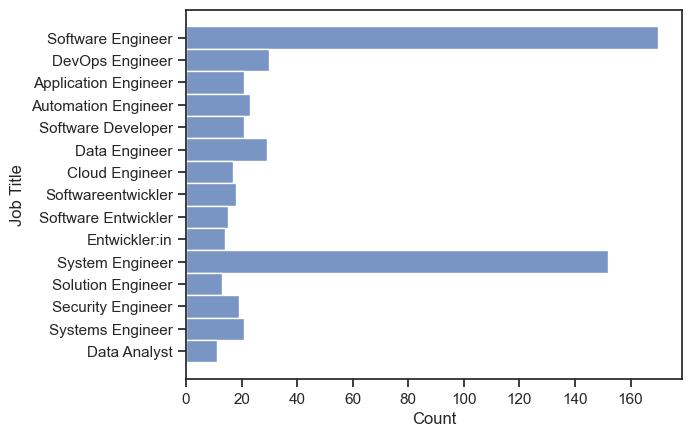

In [ ]:
sns.set_theme(style="ticks")
job_counts = df_small['job_title_cleaned'].value_counts()
sns.histplot(data = df_small[df_small['job_title_cleaned'].isin(job_counts.nlargest(15).index)], y = "job_title_cleaned")
plt.xlabel('Count')
plt.ylabel('Job Title')


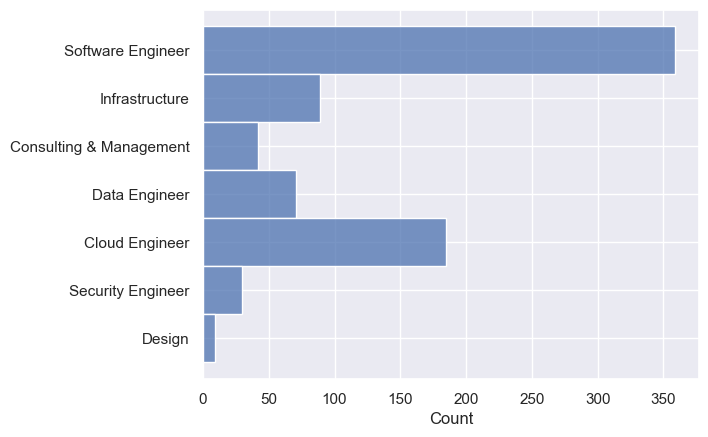

In [128]:

sns.histplot(data = df_small, y = "job_category")
plt.xlabel('Count')
plt.ylabel('')
plt.savefig("../plots/job_categories.png", bbox_inches='tight')

## Workplace

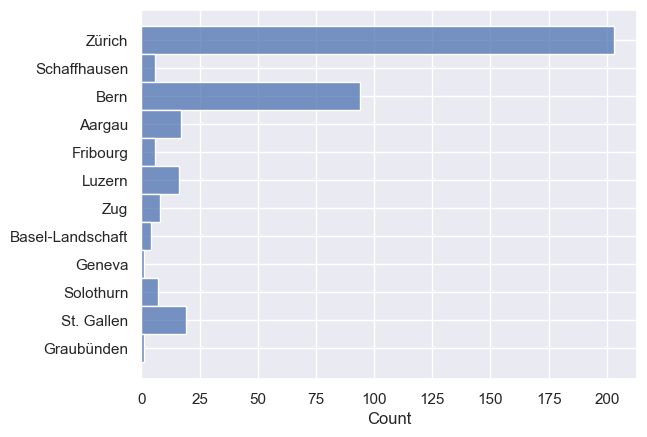

In [ ]:
sns.histplot(data = df_small, y = "canton")
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.savefig("../plots/job_locations.png", bbox_inches='tight')

## Employer

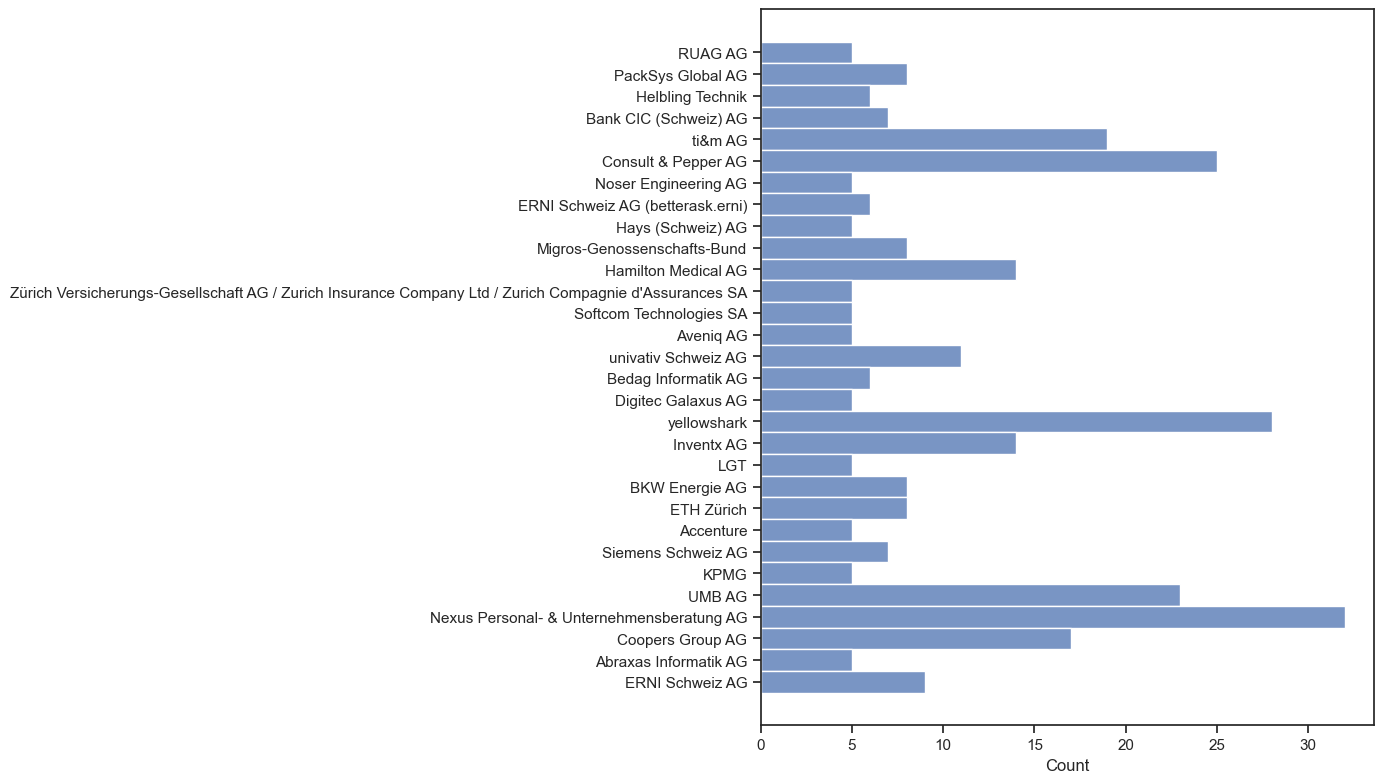

In [144]:
company_counts = df_small['company'].value_counts()
company_hist_df = df_small[df_small['company'].isin(company_counts.nlargest(30).index)]
plt.figure(figsize=(14, 8))
sns.histplot(data =company_hist_df, y = "company")

plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.savefig("../plots/job_companies.png")

## Job Level

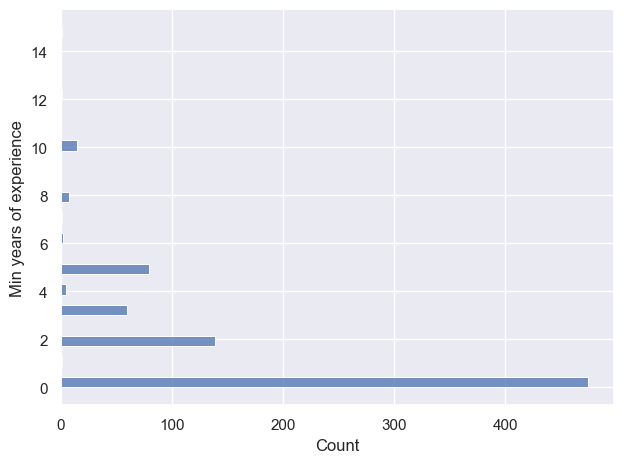

In [131]:
sns.histplot(data =df_small, y = "max_years")
plt.xlabel('Count')
plt.ylabel('Min years of experience')
plt.tight_layout()
plt.savefig("../plots/histogram_max_years.png")

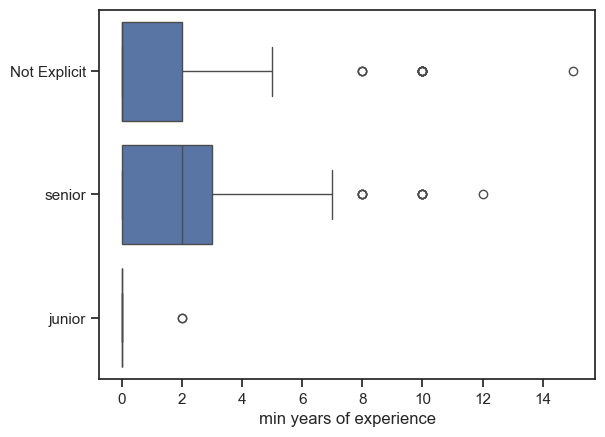

In [145]:
sns.boxplot(data =df_small, x = "max_years", y="career_stage_cleaned")

plt.xlabel('min years of experience')
plt.ylabel('')
plt.savefig("../plots/seniority.png", bbox_inches='tight')

In [133]:
df_small.groupby(["career_stage_cleaned" ])["max_years"].describe()

,count,mean,std,min,25%,50%,75%,max
career_stage_cleaned,,,,,,,,
Not Explicit,583.0,1.293310,2.110701,0.0,0.0,0.0,2.0,15.0
junior,23.0,0.173913,0.576208,0.0,0.0,0.0,0.0,2.0
senior,179.0,2.055866,2.657871,0.0,0.0,2.0,3.0,12.0


## Time

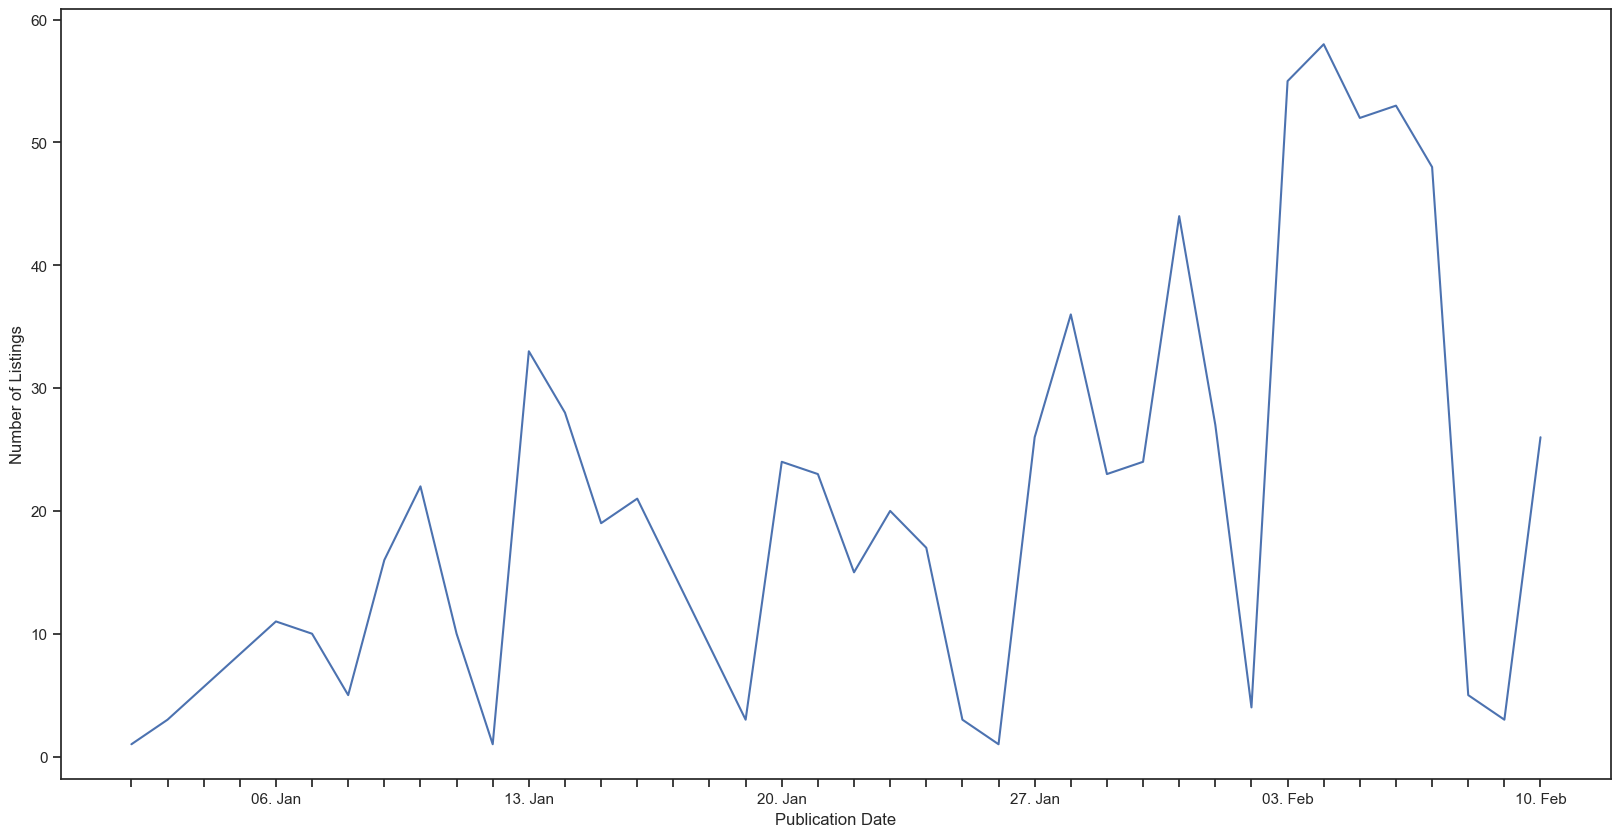

In [ ]:

df_grouped = df_small.groupby(df_small['publication_date'].dt.to_period('D')).size().reset_index(name='count')
df_grouped['publication_date'] = df_grouped['publication_date'].dt.start_time
plt.figure(figsize=(20, 10))

sns.lineplot(data=df_grouped, x='publication_date', y='count')


plt.xticks(
    ticks=pd.date_range(df_grouped['publication_date'].min(), df_grouped['publication_date'].max(), freq='D'),
    labels=['' if d.weekday() != 0 else d.strftime('%d. %b') for d in pd.date_range(df_grouped['publication_date'].min(), df_grouped['publication_date'].max(), freq='D')],
    rotation=0
)
plt.xlabel('Publication Date')
plt.ylabel('Number of Listings')
plt.savefig("../plots/time.png", bbox_inches='tight')
plt.show()

In [135]:
df_small['publication_date'].unique()

<DatetimeArray>
['2025-01-24 00:00:00', '2025-02-05 00:00:00', '2025-02-03 00:00:00',
 '2025-01-13 00:00:00', '2025-01-15 00:00:00', '2025-01-31 00:00:00',
 '2025-01-27 00:00:00', '2025-02-04 00:00:00', '2025-02-06 00:00:00',
 '2025-01-21 00:00:00', '2025-01-07 00:00:00', '2025-01-10 00:00:00',
 '2025-01-28 00:00:00', '2025-02-07 00:00:00', '2025-02-01 00:00:00',
 '2025-01-30 00:00:00', '2025-01-19 00:00:00', '2025-01-29 00:00:00',
 '2025-01-09 00:00:00', '2025-01-22 00:00:00', '2025-01-20 00:00:00',
 '2025-01-11 00:00:00', '2025-01-25 00:00:00', '2025-01-06 00:00:00',
 '2025-01-23 00:00:00', '2025-01-14 00:00:00', '2025-01-17 00:00:00',
 '2025-02-02 00:00:00', '2025-01-02 00:00:00', '2025-01-16 00:00:00',
 '2025-01-08 00:00:00', '2025-01-26 00:00:00', '2025-01-03 00:00:00',
 '2025-01-12 00:00:00', '2025-02-10 00:00:00', '2025-02-09 00:00:00',
 '2025-02-08 00:00:00']
Length: 37, dtype: datetime64[ns]

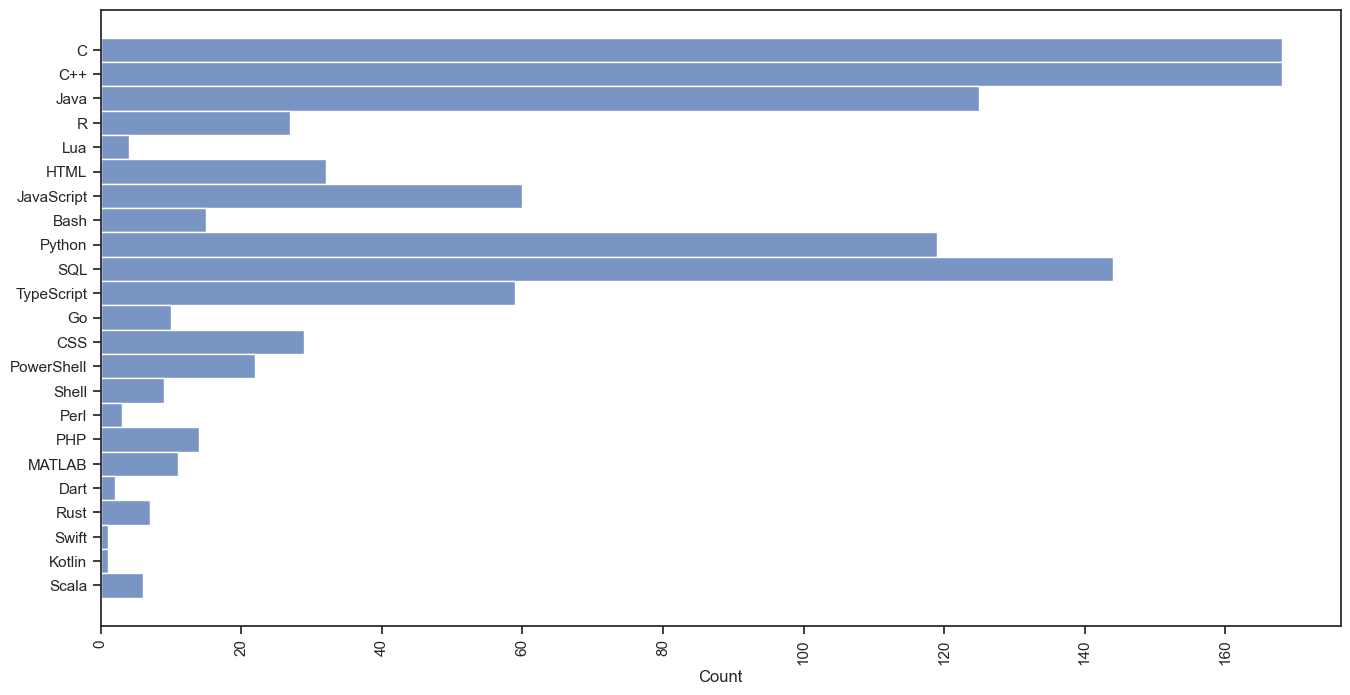

In [136]:
flat_list = [item for sublist in df_small["programming_languages"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, bins=10)
plt.xticks(rotation=90)


plt.savefig("../plots/languages.png", bbox_inches='tight')

plt.show()


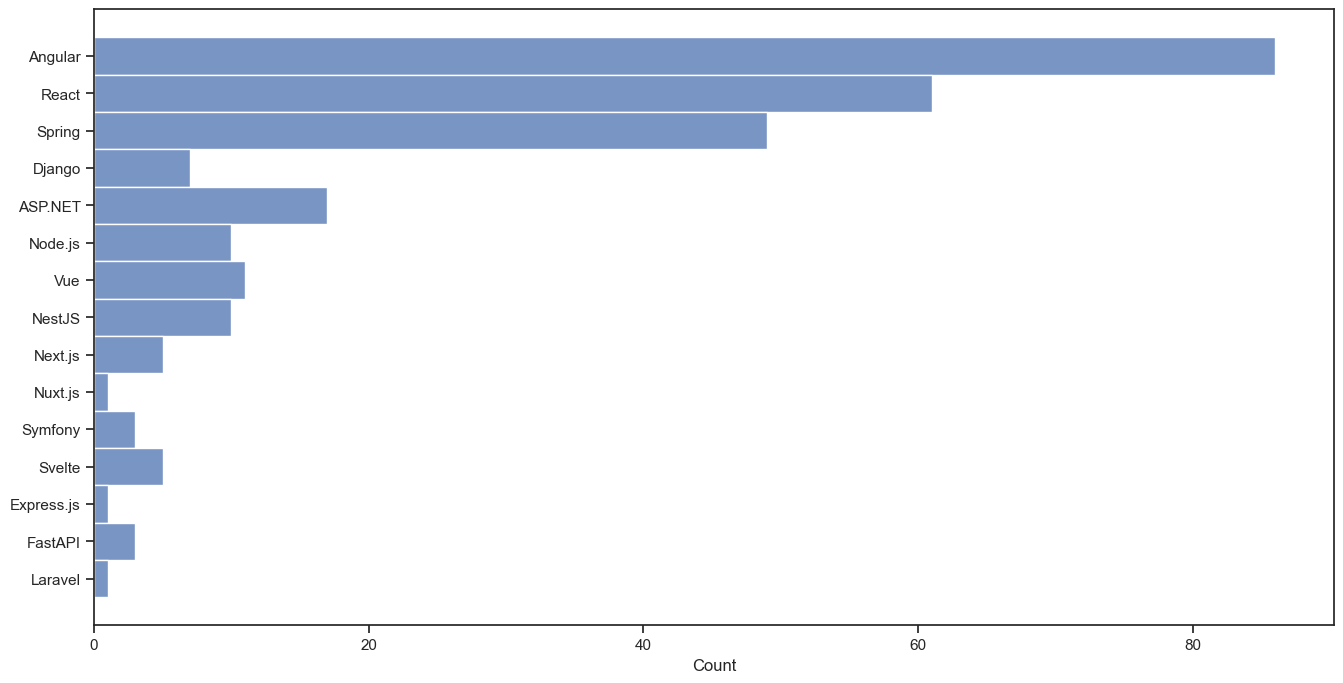

In [137]:
## Frameworks
flat_list = [item for sublist in df_small["frameworks"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, bins=10)


plt.savefig("../plots/frameworks.png", bbox_inches='tight')
plt.show()


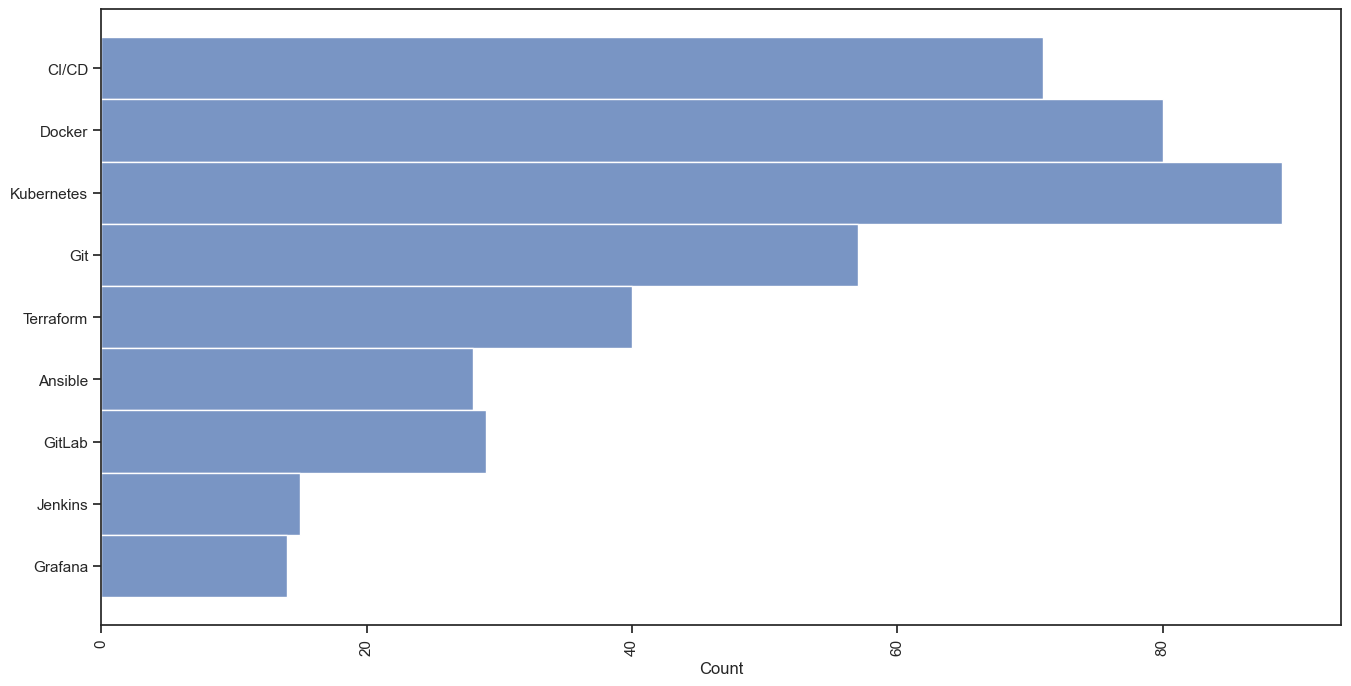

In [138]:
## Tools
flat_list = [item for sublist in df_small["tools"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, kde=False, bins=10)
plt.xticks(rotation=90)
plt.savefig("../plots/tools.png", bbox_inches='tight')
plt.show()


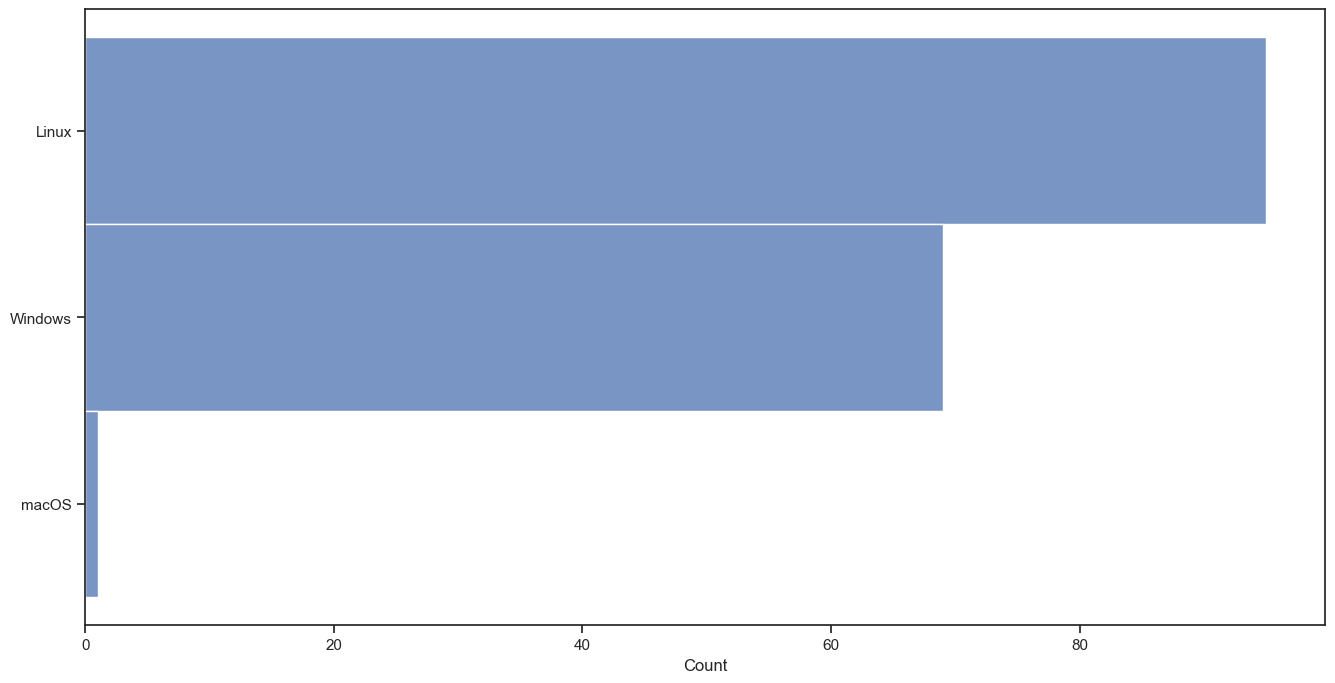

In [139]:

flat_list = [item for sublist in df_small["operating_systems"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, bins=10)

plt.show()

## My Interests

In [140]:
df_good = df_small[df_small['job_category'].isin(['Software Engineer', 'Data Engineer', 'Design'])]
df_good = df_good[df_good['max_years'] <= 2]
df_good = df_good[df_good['canton'].isin(["Zürich"])]
df_good = df_good[df_good['career_stage_cleaned']!= "senior"]
df_good = df_good[df_good['publication_date']>='2025-02-05']
df_good

,url,downloaded,search_query,publication_date,workload,contract_type,language,place_of_work,job_title,company,...,programming_languages,frameworks,tools,operating_systems,years,education,salary,website,canton,max_years
441,https://www.jobs.ch/en/vacancies/detail/610730...,True,software engineer,2025-02-06,100%,Unlimited employment,German (Fluent),Zürich,Software Engineer / Developer,Emil Frey Gruppe Schweiz,...,[SQL],[],[],[],[2],[Vocational],NaN,NaN,Zürich,2
3180,https://www.jobs.ch/en/vacancies/detail/af550a...,True,data scientist,2025-02-07,50 – 100%,Unlimited employment,NaN,Zürich,Data Scientist University 50-100% (mw),univativ Schweiz AG,...,[],[],[],[Linux],[],"[Bachelor, Master]",NaN,NaN,Zürich,0
3330,https://www.jobs.ch/en/vacancies/detail/af550a...,True,data scientist,2025-02-07,50 – 100%,Unlimited employment,NaN,Zürich,Data Scientist University 50-100% (mw),univativ Schweiz AG,...,[],[],[],[Linux],[],"[Bachelor, Master]",NaN,NaN,Zürich,0
3342,https://www.jobs.ch/en/vacancies/detail/f6946f...,True,software engineer,2025-02-10,80 – 100%,Unlimited employment,"German (Fluent), English (Intermediate)",Zürich,(Junior) Software Engineer C#/.NET (80 – 100%)...,Consult & Pepper AG,...,"[C, C++, R, TypeScript]",[Angular],[],[],[2],[],NaN,Jobs,Zürich,2
3567,https://www.itjobs.ch/jobs/software-engineer-s...,True,all jobs,2025-02-10,NaN,NaN,NaN,Zürich,Software Engineer - SharePoint Online,Coopers Group AG,...,[],[],[],[],[],[],NaN,ITJobs,Zürich,0
3577,https://www.itjobs.ch/jobs/application-enginee...,True,all jobs,2025-02-10,NaN,NaN,NaN,Zürich-Flughafen,Application Engineer ITSM,Inventx AG,...,[],[],[],[],[],[],NaN,ITJobs,Zürich,0
3623,https://www.itjobs.ch/jobs/software-engineer-j...,True,all jobs,2025-02-06,NaN,NaN,NaN,Zürich,Software Engineer Java Spring (w/m/d) 60-100%,Migros-Genossenschafts-Bund,...,[],[],[],[],[],[],NaN,ITJobs,Zürich,0
3658,https://www.itjobs.ch/jobs/automation-engineer...,True,all jobs,2025-02-06,NaN,NaN,NaN,Zürich,Automation Engineer Ansible,Coopers Group AG,...,[],[],[],[],[],[],NaN,ITJobs,Zürich,0


<Axes: xlabel='Count', ylabel='company'>

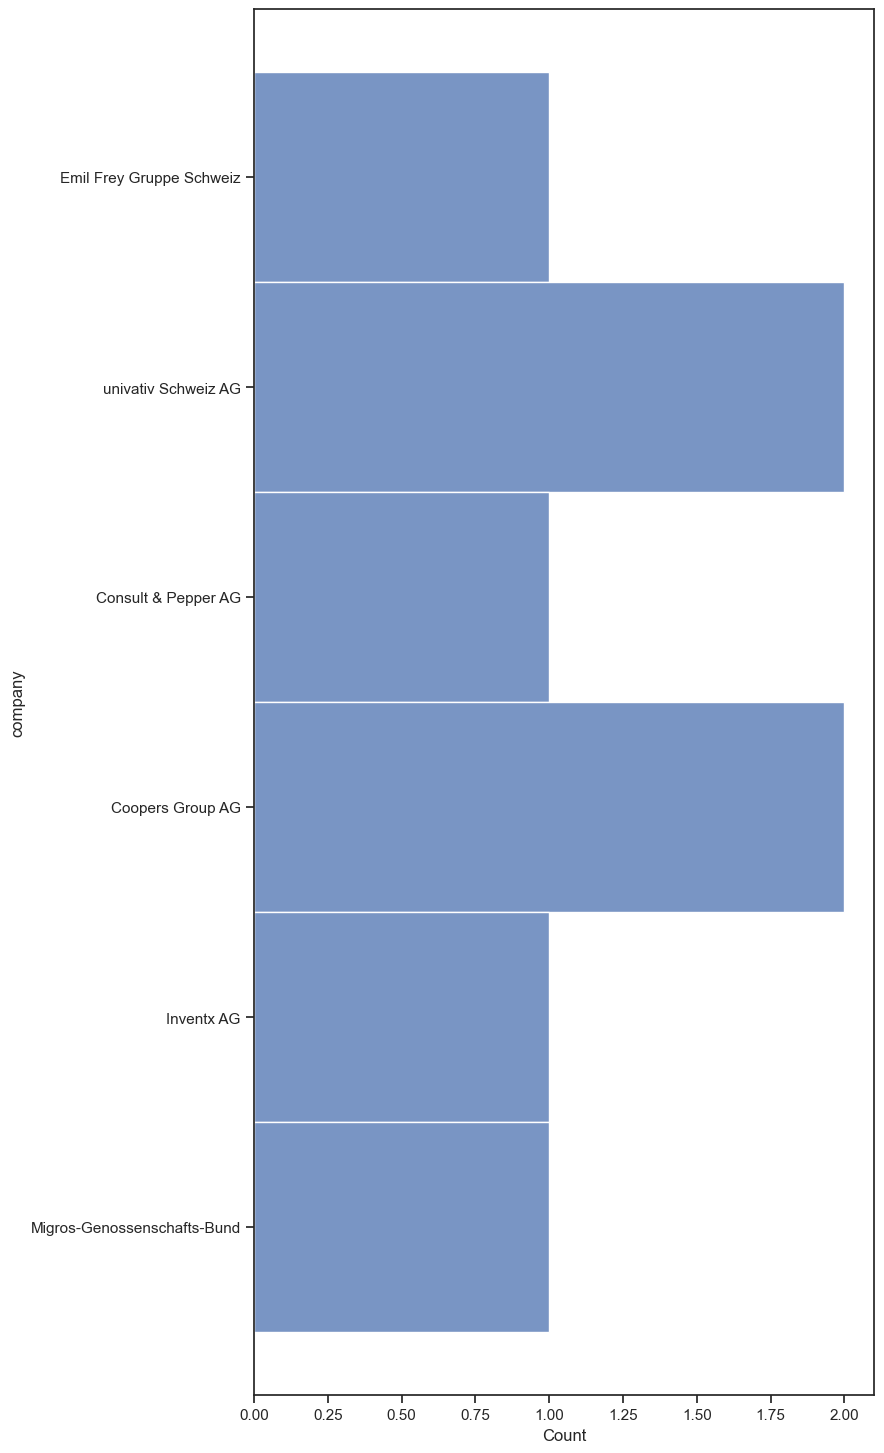

In [141]:

plt.figure(figsize=(8, 18))
sns.histplot(data =df_good, y = "company")